In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23',)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e8abb81d80>,
 'prcp': 2.0,
 'id': 0,
 'date': '2010-01-01',
 'tobs': 18.3,
 'station': 'USC00519397'}

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
last_date
# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
year_ago

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement).filter(Measurement.date >= year_ago).all()
#precipitation_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
    #*Note: Assisted by AI
precipitation_df = pd.DataFrame([(data.date, data.prcp) for data in precipitation_data], columns=['Date', 'Precipitation'])
precipitation_df
# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data



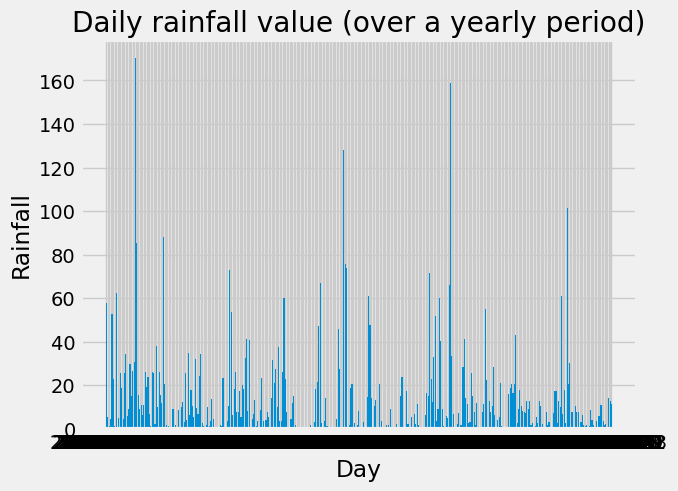

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'])
plt.xlabel("Day")
plt.ylabel("Rainfall")
plt.title("Daily rainfall value (over a yearly period)")
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [14]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e8a6e70610>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'elevation': 0.914,
 'id': 0,
 'latitude': 21.2716}

In [15]:
# Design a query to calculate the total number of stations in the dataset

station_number = session.query(Station).group_by(Station.id).count()
print(station_number)

9


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
measurement_data = session.query(Measurement).all()
measurement_df = pd.DataFrame([(data.station, data.date, data.tobs) for data in measurement_data], columns=['Station', 'Date', 'Temperature'])
station_count = measurement_df.groupby(measurement_df['Station']).count().sort_values(by='Date', ascending=False)

station_count


,Date,Temperature
Station,,
USC00519281,2772,2772
USC00519397,2724,2724
USC00513117,2709,2709
USC00519523,2669,2669
USC00516128,2612,2612
USC00514830,2202,2202
USC00511918,1979,1979
USC00517948,1372,1372
USC00518838,511,511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station_df = measurement_df[measurement_df['Station'] == 'USC00519281'][['Station', 'Date', 'Temperature']] 
top_station_df.head()
top_station_df['Temperature'].apply(["min","max","mean"])

min     12.200000
max     29.400000
mean    22.035823
Name: Temperature, dtype: float64

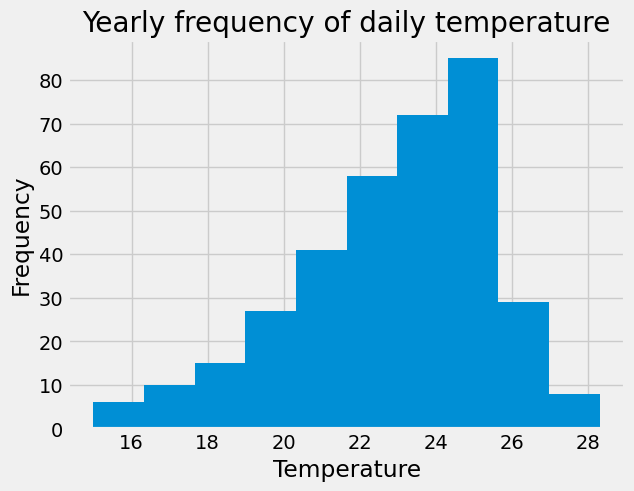

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
    # Perform a query to retrieve the data and precipitation scores
temp_top = session.query(Measurement).filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').all()
    #precipitation_data

    # Save the query results as a Pandas DataFrame. Explicitly set the column names
        #*Note: Assisted by AI
temp_top_df = pd.DataFrame([(data.date, data.tobs) for data in temp_top], columns=['Date', 'Temperature'])
temp_top_df
    # Sort the dataframe by date

temp_top_df.dropna()
plt.hist(temp_top_df['Temperature'])
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Yearly frequency of daily temperature")
plt.show()

# Close Session

In [19]:
# Close Session
session.close()
